# Trading Volume Market Shares

In [1]:
%matplotlib inline

import glob
import os
from typing import Dict, List, Union

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
BAR_SIZE = 300000 # 5 minute
TIME_BAR_DIR = f'/data/bars/TimeBar/{BAR_SIZE}'

## Read Data

In [3]:
from utils import read_bars

def get_total_volume()->pd.DataFrame:
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.{BAR_SIZE}.*.csv')

    volumes: List[Dict] = []
    for csv_file in csv_files:
        _,_,exchange,market_type,pair,_ = os.path.basename(csv_file).split('.')
        bars_df = read_bars(csv_file)
        volumes.append({'exchange': exchange, 'market_type': market_type, 'pair': pair, 
                        'coin': pair.split('_')[0],'volume_usd': bars_df['volume_quote'].sum()})
        del bars_df
    return pd.DataFrame(volumes).sort_values('volume_usd', ascending=False).reset_index(drop=True)

In [4]:
volumes_sum_df = get_total_volume()

In [5]:
volumes_sum_df

,exchange,market_type,pair,coin,volume_usd
0,Huobi,Swap,BTC_USD,BTC,1.634068e+11
1,Binance,Swap,BTC_USDT,BTC,1.572284e+11
2,BitMEX,Swap,BTC_USD,BTC,9.656688e+10
3,OKEx,Spot,BTC_USDT,BTC,3.845596e+10
4,Huobi,Swap,ETH_USD,ETH,3.558559e+10
...,...,...,...,...,...
62,Huobi,Spot,ALGO_USDT,ALGO,2.879607e+07
63,Huobi,Spot,BAT_USDT,BAT,2.252969e+07
64,Huobi,Spot,IOTA_USDT,IOTA,1.137306e+07
65,Bitfinex,Swap,ETH_USDT,ETH,1.001775e+07


In [6]:
def plot_market_shares(groupby: Union[str, List[str]]=None, chart: Union['pie', 'bar'] = 'pie')->None:
    agg_df = volumes_sum_df.groupby(groupby).agg({'volume_usd': 'sum'}).sort_values('volume_usd', ascending=False)
    if chart == 'pie':
        agg_df.plot.pie(y='volume_usd', autopct='%1.1f%%', figsize=(8, 8))
    else:
        agg_df.plot.bar(y='volume_usd', figsize=(9, 6))

## Market Shares Between Different Market Types

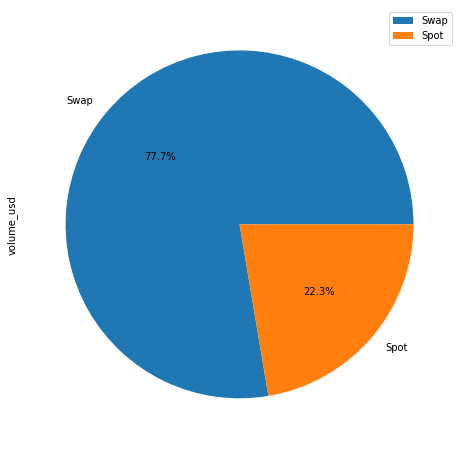

In [7]:
plot_market_shares(groupby='market_type')

## Market Shares Between Different Exchanges

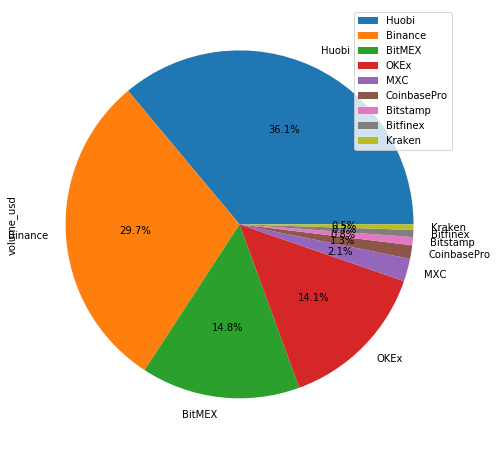

In [8]:
plot_market_shares(groupby='exchange')

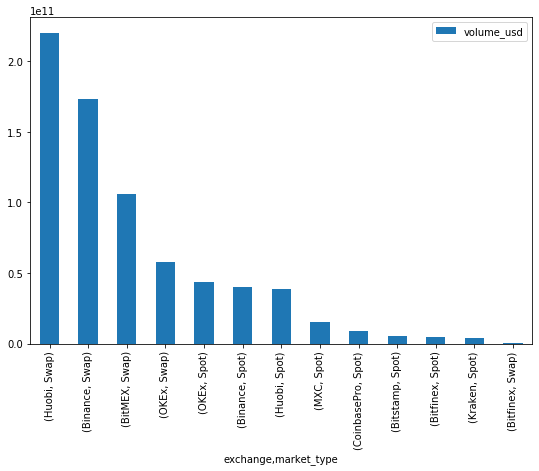

In [9]:
plot_market_shares(groupby=['exchange', 'market_type'], chart='bar')

## Bitcoin Market Shares Between Different Exchanges

In [10]:
btc_volume_df = volumes_sum_df[volumes_sum_df['coin']=='BTC'].groupby(['exchange', 'market_type']).agg({'volume_usd': 'sum'}).sort_values('volume_usd', ascending=False)

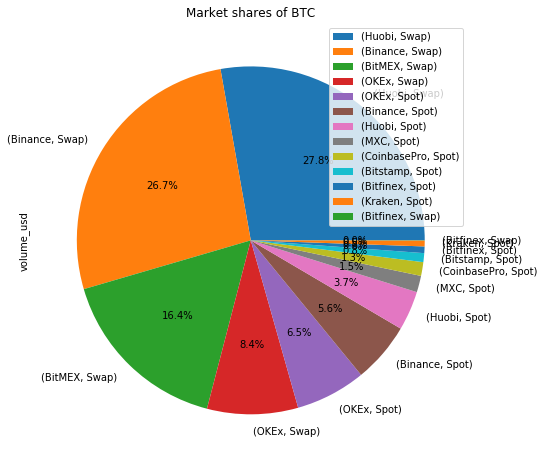

In [11]:
btc_volume_df.plot.pie(y='volume_usd', autopct='%1.1f%%', figsize=(8, 8), title='Market shares of BTC')

## Market Shares Between Different Cryptocurrencies

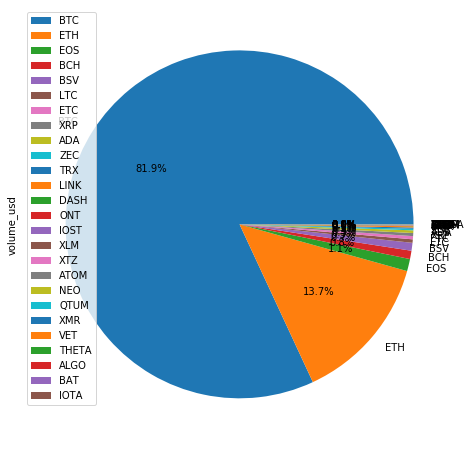

In [12]:
plot_market_shares(groupby='coin')